# Visualizing Multiple Data Sets - Part 2: Histograms for Partitioned Data

Now we return to our Covid data set and apply what we have learned about partitions and summary statistics to set up what we call binary comparisons: these are comparisons between two groups. As before, we begin by importing the data from the CSV file:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/03-first-data/covid-merged.csv"
)
df.set_index("state", inplace=True)
df["cases_norm"] = df["cases"] / df["population"] * 1000

In the following subsections, we will partition the data based on normalized gdp and how urban the state’s population is. In each case, we will partition the data into two sets by comparing the metric being studied to the median value of that metric. Here, we have chosen median because it will result in the data set being partitioned into subsets that are approximately equal in size.

## Partitioning Based on GDP

The gross domestic product (GDP) provides a measure of how affluent a state is. As we expect that GDP will increase along with population, we first add normalized GDP (in millions) per capita (in thousands) to our dataframe[^per-capita].

[^per-capita]: Since both Covid cases and GDP are being normalized per capita, the normalization could actually be dropped. However, we keep it here to be consistent with the analysis of the effect of the urban index.

In [2]:
df["gdp_norm"] = df["gdp"] / df["population"] * 1000

We will partition the data around the median of the normalized GDP, which is

In [3]:
m_gdp = df["gdp_norm"].median()
m_gdp

61.04737129841516

To partition the data let's first see what happens when a numerical column of a dataframe is compared to a value:

In [4]:
df["gdp_norm"] > m_gdp

state
Alabama           False
Alaska             True
Arizona           False
Arkansas          False
California         True
Colorado           True
Connecticut        True
Delaware           True
Florida           False
Georgia           False
Hawaii             True
Idaho             False
Illinois           True
Indiana           False
Iowa               True
Kansas             True
Kentucky          False
Louisiana         False
Maine             False
Maryland           True
Massachusetts      True
Michigan          False
Minnesota          True
Mississippi       False
Missouri          False
Montana           False
Nebraska           True
Nevada            False
New Hampshire      True
New Jersey         True
New Mexico        False
New York           True
North Carolina    False
North Dakota       True
Ohio              False
Oklahoma          False
Oregon             True
Pennsylvania       True
Rhode Island      False
South Carolina    False
South Dakota       True
Tennessee 

Pandas returns a series that contains Boolean values indicating whether the comparison for the value at each index was true or false. We can use such a series to partition our dataframe if we pass it as the index (in square brackets) to the data frame. So, we can create a dataframe with states that have population higher than the median as follows:

In [5]:
higher_gdp = df[df["gdp_norm"] > m_gdp]
higher_gdp

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695
Hawaii,609,1415872,97001.1,91.93,0.430124,68.509795
Illinois,52918,12671821,893355.5,88.49,4.176038,70.499378
Iowa,7145,3155070,196247.4,64.02,2.264609,62.200648
Kansas,4305,2913314,178605.1,74.20,1.477699,61.306505


Note the exceptionally high normalized case rate for New York (15.92) and New Jersey (13.4). 

By changine the inequality to $\le$, we can create a dataframe with states at or below the median population:

In [6]:
lower_gdp = df[df["gdp_norm"] <= m_gdp]
lower_gdp

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Florida,33683,21477737,1126510.3,91.16,1.568275,52.450139
Georgia,25431,10617423,634137.5,75.07,2.395214,59.726122
Idaho,2016,1787065,85791.1,70.58,1.128107,48.006704
Indiana,18099,6732219,384871.7,72.44,2.688415,57.168624
Kentucky,4708,4467673,218426.1,58.38,1.053792,48.890351
Louisiana,28044,4648794,259079.3,73.19,6.032532,55.730432


As expected, the two dataframes have the same size:

In [7]:
len(higher_gdp), len(lower_gdp)

(25, 25)

Let's generate histograms for case data for both the higher GDP and lower GDP data sets. We plot them on the same axes to make it easier to compare them:

Text(0, 0.5, 'Count')

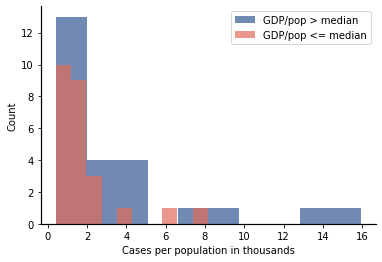

In [8]:
plt.hist(higher_gdp["cases_norm"], alpha=0.7, label="GDP/pop > median")
plt.hist(lower_gdp["cases_norm"], alpha=0.7, label="GDP/pop <= median")

plt.legend()
plt.xlabel("Cases per population in thousands")
plt.ylabel("Count")

An issue that arises when plotting histograms on the same axes is that it becomes hard to compare values when the histograms use different bins. For example, from about 0.5 to 1.8, the histogram for the higher GDP group has a single bar with 13 entries. On the other hand, the histogram for the lower GDP group has two bars, but together those two bars sum up to 19. 

To resolve this issue, lets just pass bins that span the region as the bins for each histogram:

In [9]:
mybins = np.arange(0, 18, 2)
mybins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

Text(0, 0.5, 'Count')

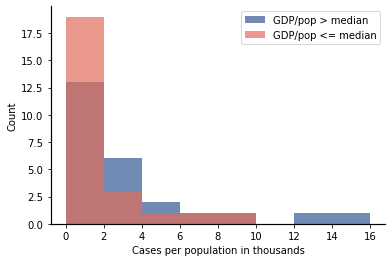

In [10]:
plt.hist(higher_gdp["cases_norm"], alpha=0.7, label="GDP/pop > median", bins=mybins)
plt.hist(lower_gdp["cases_norm"], alpha=0.7, label="GDP/pop <= median", bins=mybins)

plt.legend()
plt.xlabel("Cases per population in thousands")
plt.ylabel("Count")

The histogram shows that states with GDPs over the median have higher case counts in general (for instance, the larger bars in the range 2-5), as well as larger maximum values (above 8).  One reason for this might be that states with higher GDPs may have network effects, where more of the population interacts with a larger number of people. For instance, such states may have more of their population employed in office jobs and likely to travel for their work. 

When an effect is observed visually, we usually want to quantify that effect in some way and then test whether any observed difference is "real" (rather than just caused by randomness). Let's compare the average of the normalized number of cases for these two different groups:

In [11]:
hgdp_mu = higher_gdp["cases_norm"].mean()
lgdp_mu = lower_gdp["cases_norm"].mean()
hgdp_mu, lgdp_mu

(3.511232264232122, 1.9258062634390536)

There is a substantial difference between the two average values. However, the average is more sensitive to extreme values, such as the large normalized case rates of New York and New Jersey. One way to deal with this is to use a statistic that is not as sensitive to extrema; for example, the median is such a statistic:


In [12]:
higher_gdp["cases_norm"].median(), lower_gdp["cases_norm"].median()

(1.9453983135416348, 1.3878449780364717)

**Exercise**

A new data frame can be created that excludes New York and New Jersey using the following command:

In [13]:
df2 = df.drop(["New York", "New Jersey"])

Using this reduced data set, partition the data around the median normalized GDP, plot the histograms for the normalized Covid rates of the two partitions, and find the average normalized Covid rates for the two partitions.

**Exercise**

Partition the data around the **mean** GDP. Plot the histograms and find the averages for this new grouping.

## Partitioning Based on Urban Index

Some of the networking effects mentioned in the previous section may be associated with populations living in large, urban areas. In this section, we partition the data based on the urban index, which is the percentage of the population that is living in an urban area.  As before, we start by finding the median urban index for the states:

In [14]:
m_urban = df["urban"].median()
m_urban

73.735

Now we use that median to partition the data and plot the histograms:

In [15]:
higher_urban = df[df["urban"] > m_urban]
lower_urban = df[df["urban"] <= m_urban]

Text(0, 0.5, 'Count')

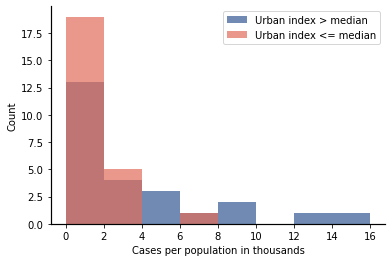

In [16]:
plt.hist(
    higher_urban["cases_norm"], alpha=0.7, label="Urban index > median", bins=mybins
)
plt.hist(
    lower_urban["cases_norm"], alpha=0.7, label="Urban index <= median", bins=mybins
)
plt.legend()
plt.xlabel("Cases per population in thousands")
plt.ylabel("Count")

As with normalized GDP, a substantial difference in distribution of normalized number of Covid cases is seen for states that are more urban versus less urban. The average normalized case rates for these partitions are:

In [17]:
higher_urban["cases_norm"].mean(), lower_urban["cases_norm"].mean()

(3.8908656178327066, 1.5461729098384682)

Again, a substantial difference in averages is observed.  Some additional tests are left as exercises for the reader:

**Exercise** 

Compare the medians for these two groups.

**Exercise**

Remove New York and New Jersey from the data set and recreate the histograms and averages for the partitioned data set without those two states.

## Reading Assignment

* [Exploring Histograms](https://tinlizzie.org/histograms/)